In [9]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
X = pd.read_csv("D:\SummerResearch\data\mnist28\onehot_mnist28_sdv_100k.csv")
y = X['label']
X = X.drop(columns=['label'])
print(type(X), type(y))
print(X.shape, y.shape)

sorted_columns = sorted(X.columns, key=int)
# Reorder the DataFrame columns
X = X[sorted_columns]
X = X.to_numpy()
y = y.to_numpy()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(100000, 784) (100000,)


In [1]:
paths = {
'mnist12': {
    'train_original': 'D:\SummerResearch/data/mnist12/onehot_mnist12_train.csv',
    'test': 'D:\SummerResearch/data/mnist12/onehot_mnist12_test.csv',
    'synthetic': {
        'ctgan': 'D:\SummerResearch/data/mnist12/onehot_mnist12_sdv_100k.csv',
        'categorical': 'D:\SummerResearch/data/mnist12/onehot_mnist12_sdv_categorical_100k.csv',
        'gaussian': 'D:\SummerResearch/data/mnist12/onehot_mnist12_sdv_gaussian_100k.csv',
        'pca_gmm_num': 'D:\SummerResearch/data/mnist12/onehot_mnist12_sdv_pca_gmm_num_100k.csv',
        'pca_gmm_cat': 'D:\SummerResearch/data/mnist12/onehot_mnist12_sdv_pca_gmm_cat_100k.csv'
    },
    'target_name': 'label'
},
'mnist28': {
    'train_original': 'D:\SummerResearch/data/mnist28/onehot_mnist28_train.csv',
    'test': 'D:\SummerResearch/data/mnist28/onehot_mnist28_test.csv',
    'synthetic': {
        'ctgan': 'D:\SummerResearch/data/mnist28/onehot_mnist28_sdv_100k.csv',
        'categorical': 'D:\SummerResearch/data/mnist28/onehot_mnist28_sdv_categorical_100k.csv',
        'gaussian': 'D:\SummerResearch/data/mnist28/onehot_mnist28_sdv_gaussian_100k.csv',
        # 'pca_gmm_num': 'D:\SummerResearch/data/mnist28/onehot_mnist28_sdv_pca_gmm_num_100k.csv',
        'pca_gmm_cat': 'D:\SummerResearch/data/mnist28/onehot_mnist28_sdv_pca_gmm_cat_100k.csv'
    },
    'target_name': 'label'
}
}

In [59]:
import random
import matplotlib.pyplot as plt

def compare_synthetic_methods(dataset_name, num_samples=12):
    """
    Compare the results of different synthetic data generation methods, ensuring at least one instance of each class is shown
    """
    if num_samples < 10:
        raise ValueError("Number of samples must be at least 10 to ensure all classes are represented")
    
    # Load the target labels from one of the synthetic datasets
    df0 = pd.read_csv(paths[dataset_name]['synthetic']['ctgan'])
    print(df0)
    y = df0[paths[dataset_name]['target_name']].values

    print(y)

    # Ensure at least one sample per class
    sample_indices = [random.choice(np.where(y == i)[0]) for i in range(10)]

    # Add random samples if more than 10 samples are requested
    if num_samples > 10:
        additional_samples = random.sample(range(len(y)), num_samples - 10)
        sample_indices.extend(additional_samples)

    # Plot the samples
    fig, axes = plt.subplots(num_samples, len(paths[dataset_name]['synthetic']), figsize=(12, 20))
    for i, method in enumerate(paths[dataset_name]['synthetic']):
        df = pd.read_csv(paths[dataset_name]['synthetic'][method])

        # for index in sample_indices:
        for q in range(num_samples):
            index = sample_indices[q]
            img = df.loc[index].values[:-1].reshape(28, 28)
            y = df.loc[index].values[-1]


            axes[q, i].imshow(img, cmap='gray')
            axes[q, i].set_title(f'{method}: {y}')
            axes[q, i].axis('off')
    
    plt.tight_layout()
    plt.show()


       0  1  10  100  101  102  103  104  105  106  ...  91  92  93  94  95  \
0      0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   
1      0  0   0    0    0    1    1    0    0    0  ...   0   0   0   0   0   
2      0  0   0    0    0    0    0    0    0    0  ...   0   0   1   0   0   
3      0  0   0    0    0    0    0    1    0    0  ...   0   0   0   0   0   
4      0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   
...   .. ..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ..   
99995  0  0   0    0    0    0    0    0    0    0  ...   0   0   0   0   0   
99996  0  0   0    0    0    1    1    0    0    0  ...   0   0   0   0   0   
99997  0  0   0    0    1    0    0    0    0    0  ...   0   0   0   0   0   
99998  0  0   0    0    0    0    1    0    0    0  ...   0   0   0   0   0   
99999  0  0   0    0    1    0    1    0    0    0  ...   0   0   0   0   0   

       96  97  98  99  label  
0       0   0   0   

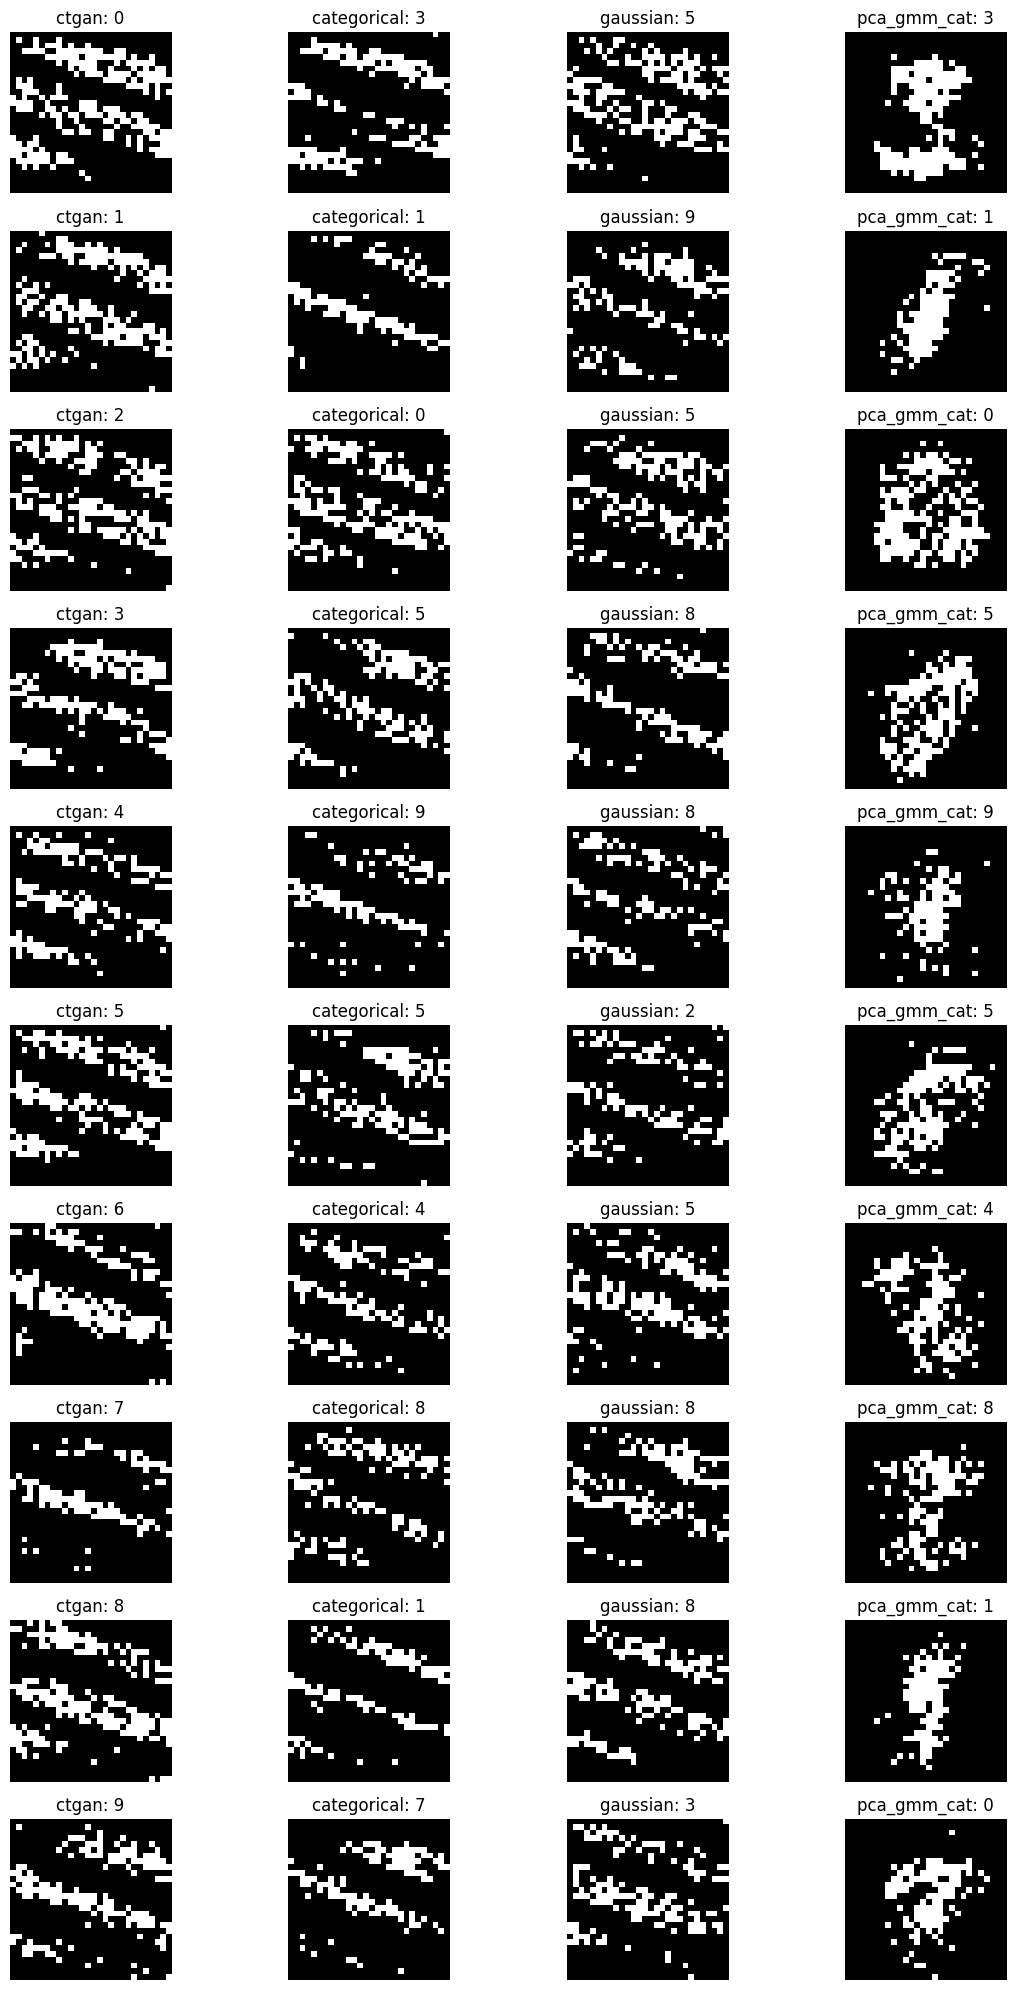

In [60]:
compare_synthetic_methods('mnist28', 10)

In [61]:
import random
import matplotlib.pyplot as plt

def compare_synthetic_methods2(dataset_name, num_samples=12):
    """
    Compare the results of different synthetic data generation methods, ensuring at least one instance of each class is shown
    """
    if num_samples < 10:
        raise ValueError("Number of samples must be at least 10 to ensure all classes are represented")
    
    df_dict = {}

    for method in paths[dataset_name]['synthetic']:
        df = pd.read_csv(paths[dataset_name]['synthetic'][method])
        df_dict[method] = df

    fig, axes = plt.subplots(num_samples, len(paths[dataset_name]['synthetic']), figsize=(12, 20))

    col = 0

    # for each dataframe, get 10 samples, ensuring at least one of each class
    for method in df_dict:
        df = df_dict[method]
        y = df[paths[dataset_name]['target_name']].values

        # Ensure at least one sample per class
        sample_indices = [random.choice(np.where(y == i)[0]) for i in range(10)]

        # Add random samples if more than 10 samples are requested
        if num_samples > 10:
            additional_samples = random.sample(range(len(y)), num_samples - 10)
            sample_indices.extend(additional_samples)

        # Plot the samples
        for q in range(num_samples):
            index = sample_indices[q]
            img = df.loc[index].values[:-1].reshape(28, 28)
            y = df.loc[index].values[-1]

            axes[q, col].imshow(img, cmap='gray')
            axes[q, col].set_title(f'{method}: {y}')
            axes[q, col].axis('off')

        col += 1

    plt.tight_layout()
    plt.show()



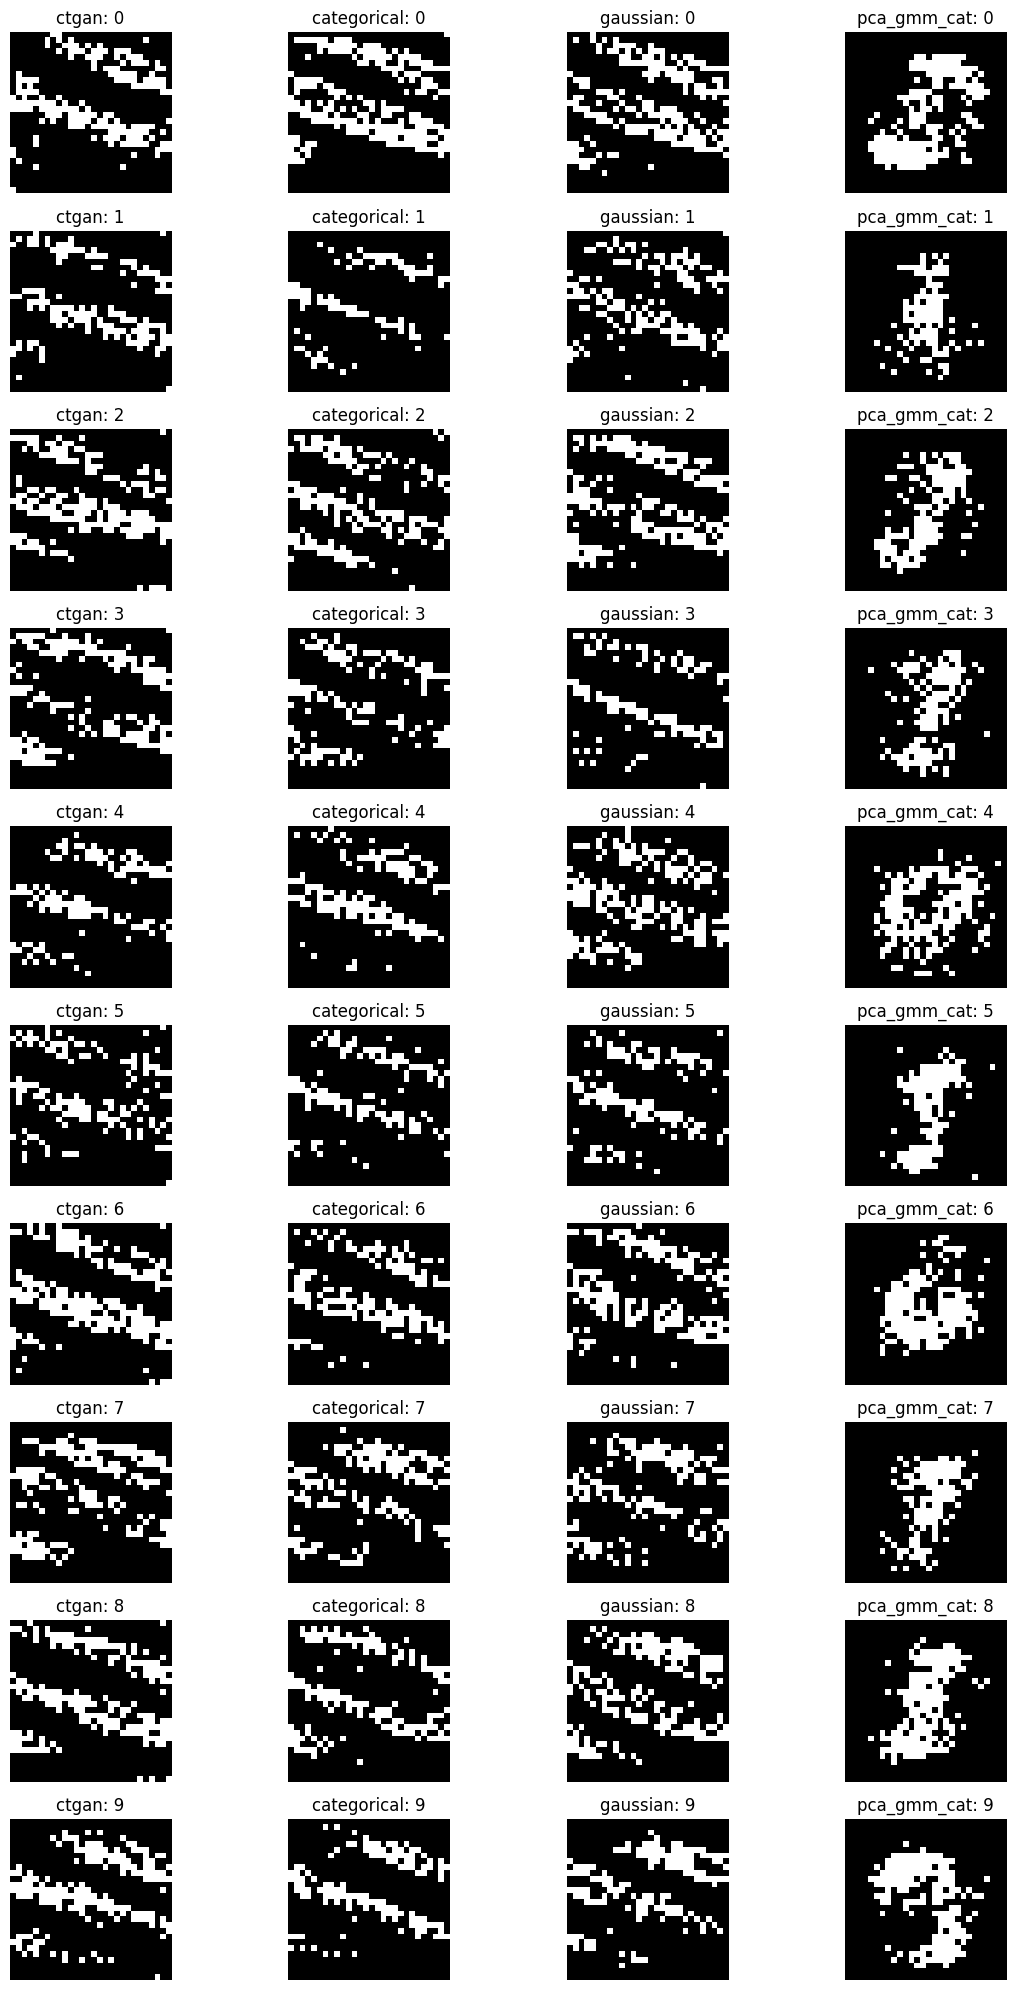

In [62]:
compare_synthetic_methods2('mnist28', 10)

In [5]:
import sys
import os
import pandas as pd

# from mnist28 import *
# from mnist12 import *

df_ori = pd.read_csv(paths['mnist28']['train_original'])
X_ori = df_ori.drop(columns=[paths['mnist28']['target_name']])
y_ori = df_ori[paths['mnist28']['target_name']]

df_pca_gmm = pd.read_csv(paths['mnist28']['synthetic']['pca_gmm_cat'])
X_pca_gmm = df_pca_gmm.drop(columns=[paths['mnist28']['target_name']])

target_name = paths['mnist28']['target_name']


# sys.path.insert(0, "/path/to/your/module")

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from synthesizer import *
from naive_bayes import *

test_df_gauss = create_label_gaussianNB(X_ori, y_ori, X_pca_gmm, target_name = target_name, filename=None)

test_df_cat = create_label_categoricalNB(X_ori, y_ori, X_pca_gmm, target_name = target_name, filename=None)

test_df_cat_no_smoothing = create_label_categoricalNB(X_ori, y_ori, X_pca_gmm, target_name = target_name, filename=None, alpha=0, force_alpha=False)





Null values in xtrain:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


Null values in xtest:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


Null values in xtrain:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


Null values in xtest:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


Null values in xtrain:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


Null values in xtest:  0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


d:\SummerResearch\summer_research\Lib\site-packages\sklearn\naive_bayes.py:620: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [8]:
import random
import matplotlib.pyplot as plt


def get_indices(y, num_samples, seed=42):
    """
    Get indices for samples, ensuring at least one of each class is included
    """
    random.seed(seed)

    # Ensure at least one sample per class
    sample_indices = [random.choice(np.where(y == i)[0]) for i in range(10)]

    # Add random samples if more than 10 samples are requested
    if num_samples > 10:
        additional_samples = random.sample(range(len(y)), num_samples - 10)
        sample_indices.extend(additional_samples)

    return sample_indices


def compare_synthetic_methods3(df_dict, synth_basis, num_samples=12, random_seed=42):
    """
    Compare the results of different synthetic data generation methods, ensuring at least one instance of each class is shown
    synth_basis: the name of the synthetic method to use as the basis for to choose the samples (0-9)
    df_dict = {
        'original': df_ori,
        'ctgan': df_ctgan,
        'gaussian': test_df_gauss,
        'categorical': test_df_cat,
        'pca_gmm_cat': df_pca_gmm
    }
    """
    if num_samples < 10:
        raise ValueError("Number of samples must be at least 10 to ensure all classes are represented")

    # for each dataframe, get 10 samples, ensuring at least one of each class

    y_ctgan = df_dict['ctgan'][target_name].values
    y_syn_basis = df_dict[synth_basis][target_name].values
    y_ori = df_dict['original'][target_name].values

    # Ensure at least one sample per class
    sample_indices_ctgan = get_indices(y_ctgan, num_samples, seed=random_seed)
    sample_indices_syn_basis = get_indices(y_syn_basis, num_samples, seed=random_seed)
    sample_indices_ori = get_indices(y_ori, num_samples, seed=random_seed)

    # Plot the samples
    fig, axes = plt.subplots(num_samples, len(df_dict), figsize=(2*len(df_dict), 20))

    for q in range(num_samples):
        index_ori = sample_indices_ori[q]
        img_ori = df_dict['original'].loc[index_ori].values[:-1].reshape(28, 28)
        y_ori = df_dict['original'].loc[index_ori].values[-1]

        axes[q, 0].imshow(img_ori, cmap='gray')
        axes[q, 0].set_title(f'original: {y_ori}')
        axes[q, 0].axis('off')

        index_ctgan = sample_indices_ctgan[q]
        img_ctgan = df_dict['ctgan'].loc[index_ctgan].values[:-1].reshape(28, 28)
        y_ctgan = df_dict['ctgan'].loc[index_ctgan].values[-1]

        axes[q, 1].imshow(img_ctgan, cmap='gray')
        axes[q, 1].set_title(f'ctgan: {y_ctgan}')
        axes[q, 1].axis('off')


        others = df_dict.keys() - {'ctgan', 'original'}
        for i, method in enumerate(others):
            index = sample_indices_syn_basis[q]
            img = df_dict[method].loc[index].values[:-1].reshape(28, 28)
            y = df_dict[method].loc[index].values[-1]

            axes[q, i+2].imshow(img, cmap='gray')
            axes[q, i+2].set_title(f'{method}: {y}')
            axes[q, i+2].axis('off')

    plt.tight_layout()
    plt.show()

def sort_columns(df):
    X = df.drop(columns=[target_name])
    sorted_columns = sorted(X.columns, key=int)
    X = X[sorted_columns]
    return pd.concat([X, df[target_name]], axis=1)

In [8]:
sorted_categorical = sort_columns(test_df_cat)
sorted_categorical.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


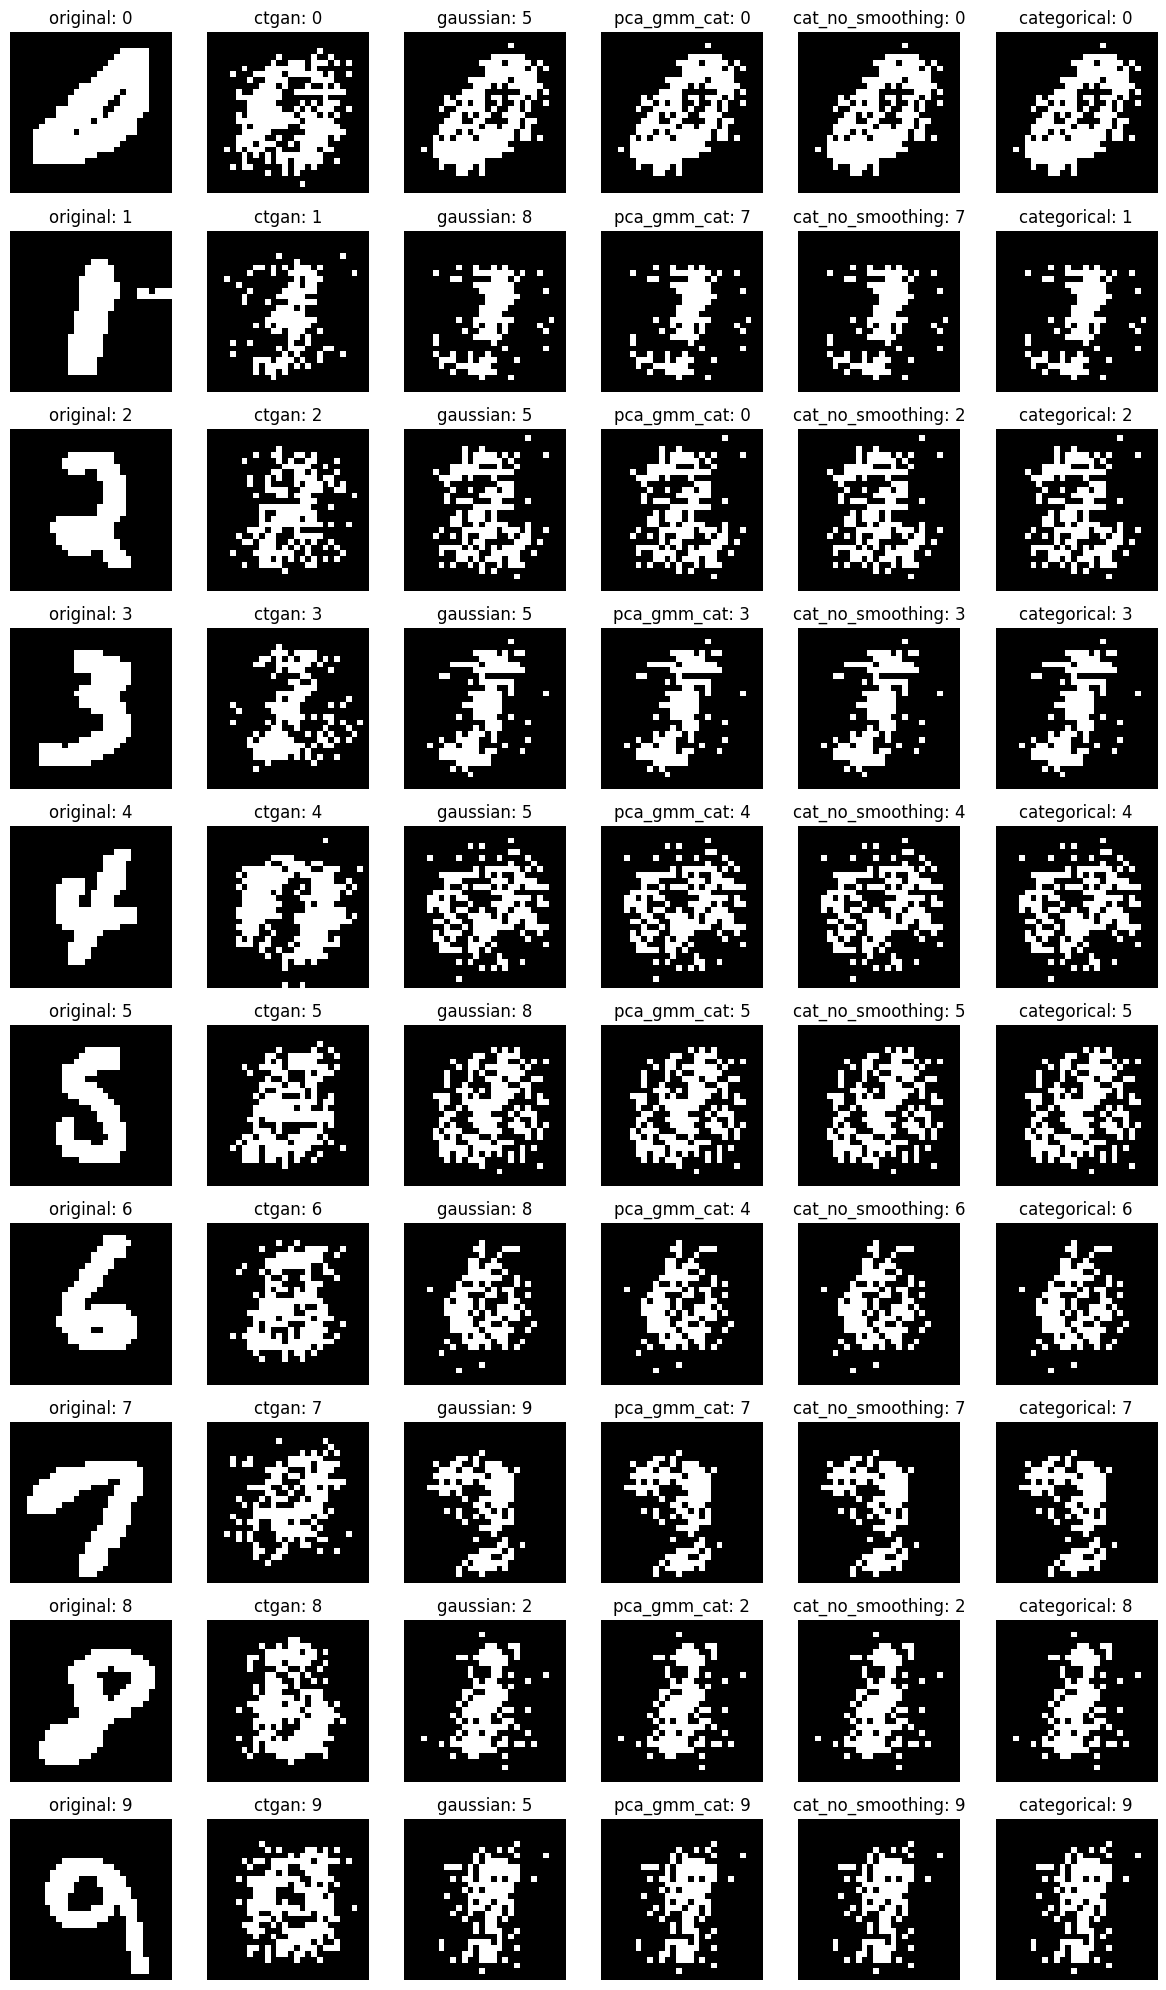

In [14]:
df_ctgan = pd.read_csv(paths['mnist28']['synthetic']['ctgan'])
df_dict = {
    'original': df_ori,
    'ctgan': sort_columns(df_ctgan),
    'categorical': sort_columns(test_df_cat),
    'cat_no_smoothing': sort_columns(test_df_cat_no_smoothing),
    'pca_gmm_cat': sort_columns(df_pca_gmm),
    'gaussian': sort_columns(test_df_gauss),

}

compare_synthetic_methods3(df_dict, 'categorical', 10)

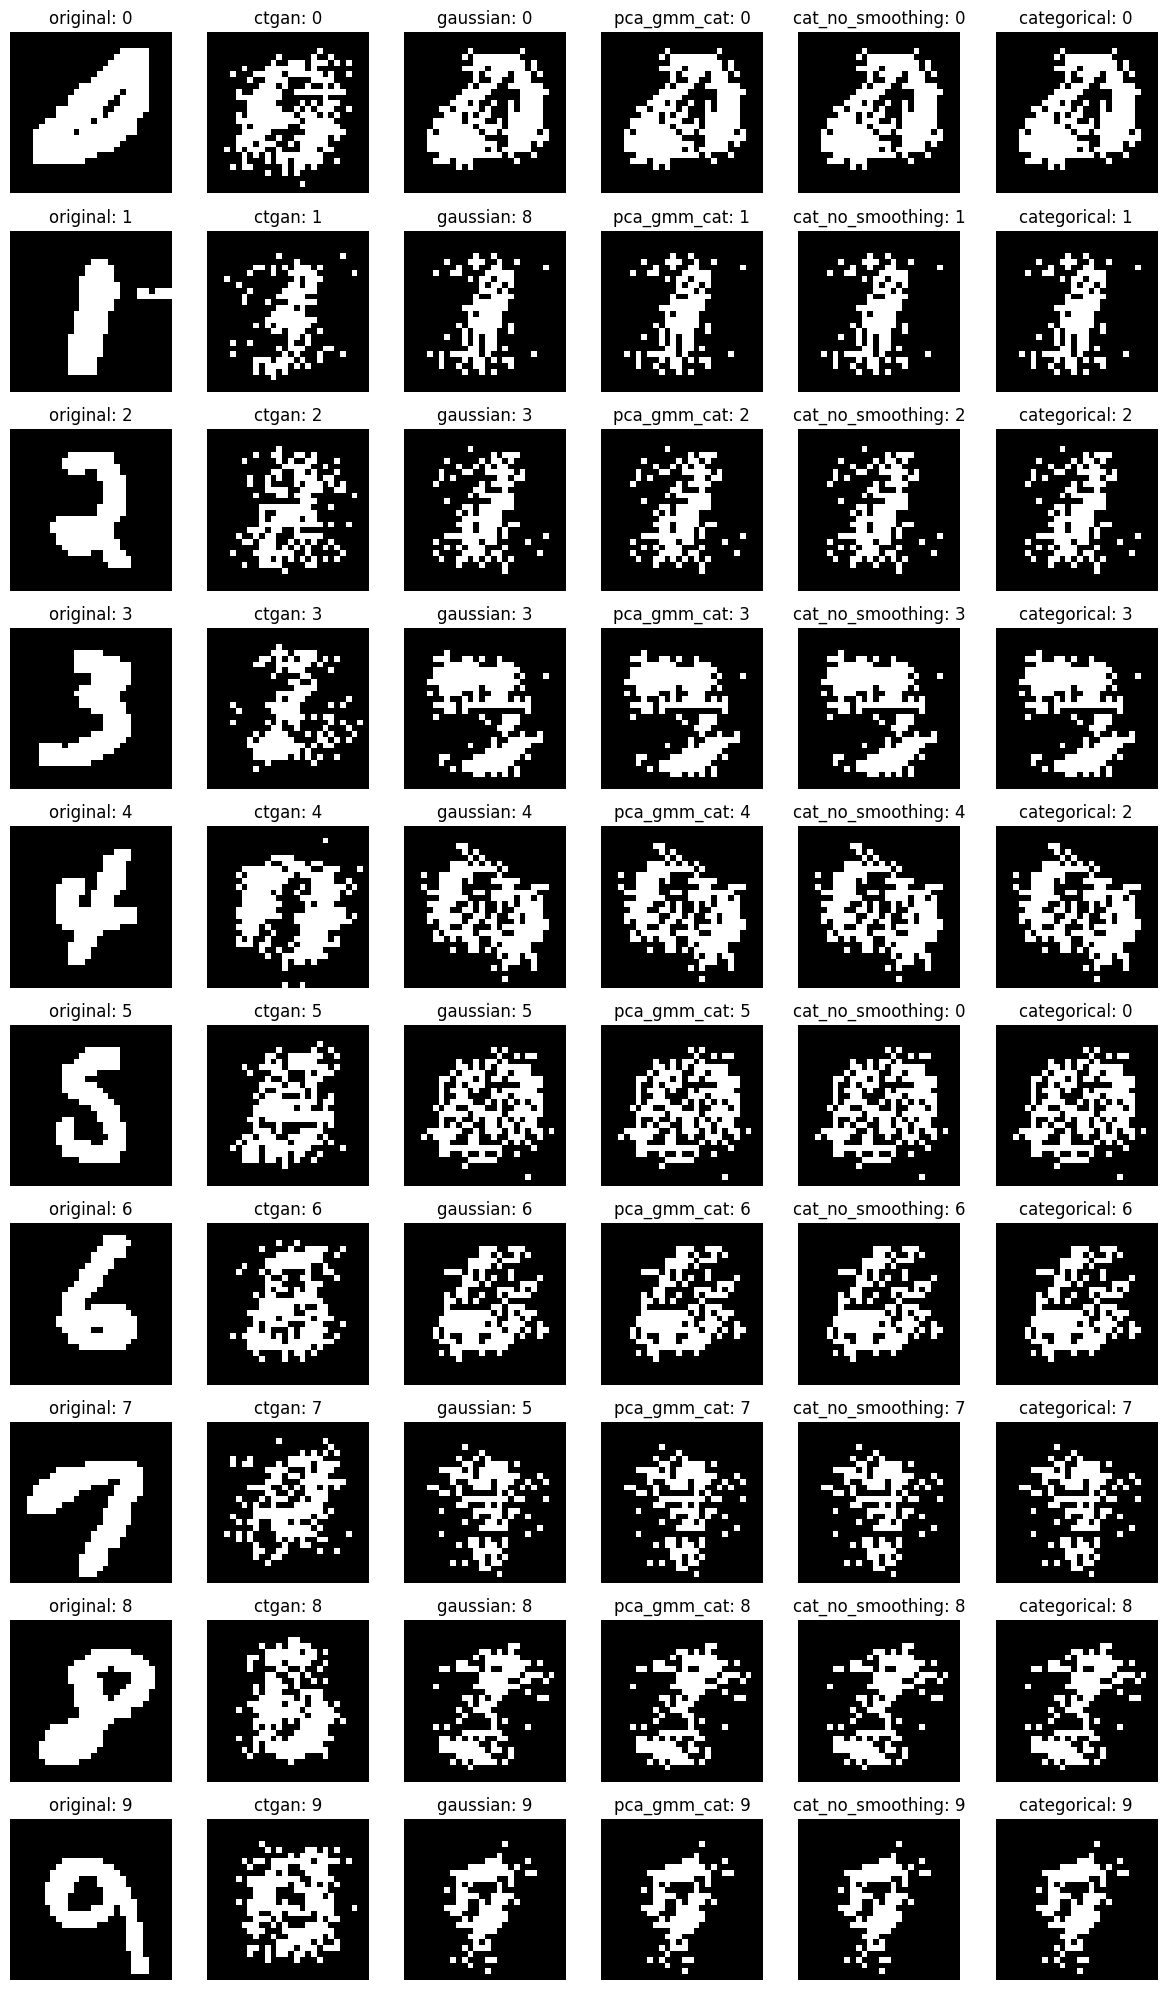

In [13]:
df_ctgan = pd.read_csv(paths['mnist28']['synthetic']['ctgan'])
df_dict = {
    'original': df_ori,
    'ctgan': sort_columns(df_ctgan),
    'categorical': sort_columns(test_df_cat),
    'cat_no_smoothing': sort_columns(test_df_cat_no_smoothing),
    'pca_gmm_cat': sort_columns(df_pca_gmm),
    'gaussian': sort_columns(test_df_gauss),

}

compare_synthetic_methods3(df_dict, 'pca_gmm_cat', 10)

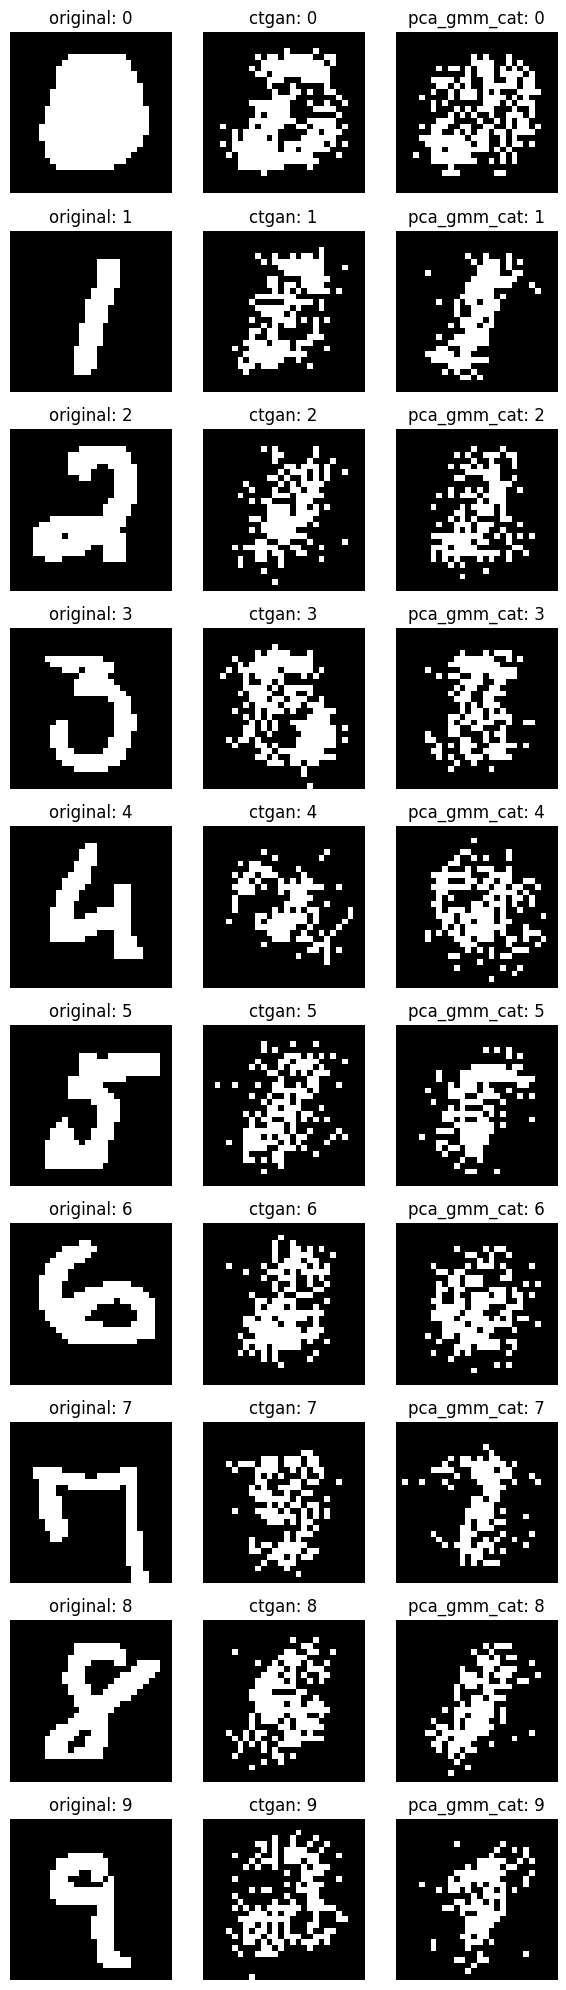

In [19]:
import pandas as pd
df_ctgan = pd.read_csv(paths['mnist28']['synthetic']['ctgan'])
df_dict = {
    'original': df_ori,
    'ctgan': sort_columns(df_ctgan),
    # 'categorical': sort_columns(test_df_cat),
    # 'cat_no_smoothing': sort_columns(test_df_cat_no_smoothing),
    'pca_gmm_cat': sort_columns(df_pca_gmm),
    # 'gaussian': sort_columns(test_df_gauss),

}

compare_synthetic_methods3(df_dict, 'pca_gmm_cat', num_samples = 10, random_seed = 69)